In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
def norma(x):
    if(x <= 10):
        return x
    elif(x == 12 or x == 13):
        return 10
    return 5

In [3]:
df = pd.read_csv("meteo_TRAIN.csv")
df.sort_values("Unnamed: 0")
df["total cloud cover"] = df["total cloud cover"].apply(norma)
weather = list(df["precipitation true"].iloc[1:])
co_2 = list(df["value"].iloc[1:])
air_temperature = list(df["air temperature (dry termometer)"].iloc[1:])
df.drop(len(df)-1, axis=0, inplace=True)
df["precipitation true"] = weather
df["co_2_(+3)"] = co_2
df["air_temperature(+3)"] = air_temperature

rat = len(df[df["precipitation true"] == 0]) // len(df[df["precipitation true"] == 1])
df_1 = df[df["precipitation true"] == 1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
df = pd.concat([df[df["precipitation true"] == 0], df_1]).sample(frac=1)

scaler = StandardScaler()
dataset = df.drop(["precipitation false", "Unnamed: 0", "weather between time", "night"], axis=1)
dataset_old = df.drop(["precipitation false", "Unnamed: 0", "weather between time", "night", "co_2_(+3)", "air_temperature(+3)"], axis=1)
X = np.array(dataset.drop("precipitation true", axis=1))
X = scaler.fit_transform(X)
y = np.array(dataset["precipitation true"])
X_old = np.array(dataset_old.drop("precipitation true", axis=1))
X_old = scaler.fit_transform(X_old)
y_old = np.array(dataset_old["precipitation true"])
X_res = np.array(result_dataset.drop("precipitation true", axis=1))
X_res = scaler.fit_transform(X_res)
y_res = np.array(result_dataset["precipitation true"])

In [4]:
df["precipitation true"].mean()

0.4856448577127286

In [5]:
scaler = StandardScaler()

dataset = df.drop(["precipitation false", "Unnamed: 0", "weather between time", "night"], axis=1)#value - co2 and air temperature (dry termometer)
dataset_old = df.drop(["precipitation false", "Unnamed: 0", "weather between time", "night", "co_2_(+3)", "air_temperature(+3)"], axis=1)#датасет без новых столбцов с сдвигом
result_dataset = dataset_old.drop(["total cloud cover"], axis=1)


X = np.array(dataset.drop("precipitation true", axis=1))
X = scaler.fit_transform(X)
y = np.array(dataset["precipitation true"])

X_old = np.array(dataset_old.drop("precipitation true", axis=1))
X_old = scaler.fit_transform(X_old)
y_old = np.array(dataset_old["precipitation true"])

X_res = np.array(result_dataset.drop("precipitation true", axis=1))
X_res = scaler.fit_transform(X_res)
y_res = np.array(result_dataset["precipitation true"])

In [199]:
dataset.head()

,total cloud cover,average wind speed,air temperature (dry termometer),relative air humidity,atmospheric pressure (station level),value,day,precipitation true,co_2_(+3),air_temperature(+3)
38683,0.0,2.0,16.8,83.0,1003.7,362.84,0,0,408.41,12.7
23958,4.0,1.0,15.2,66.0,1013.2,397.79,0,0,378.48,-6.3
702,10.0,5.0,-4.8,81.0,978.0,403.08,1,0,365.63,-15.1
77117,10.0,3.0,-9.5,85.0,977.7,406.44,0,1,369.56,-1.1
17704,9.0,1.0,-2.4,74.0,1008.0,396.52,1,0,371.78,-10.5


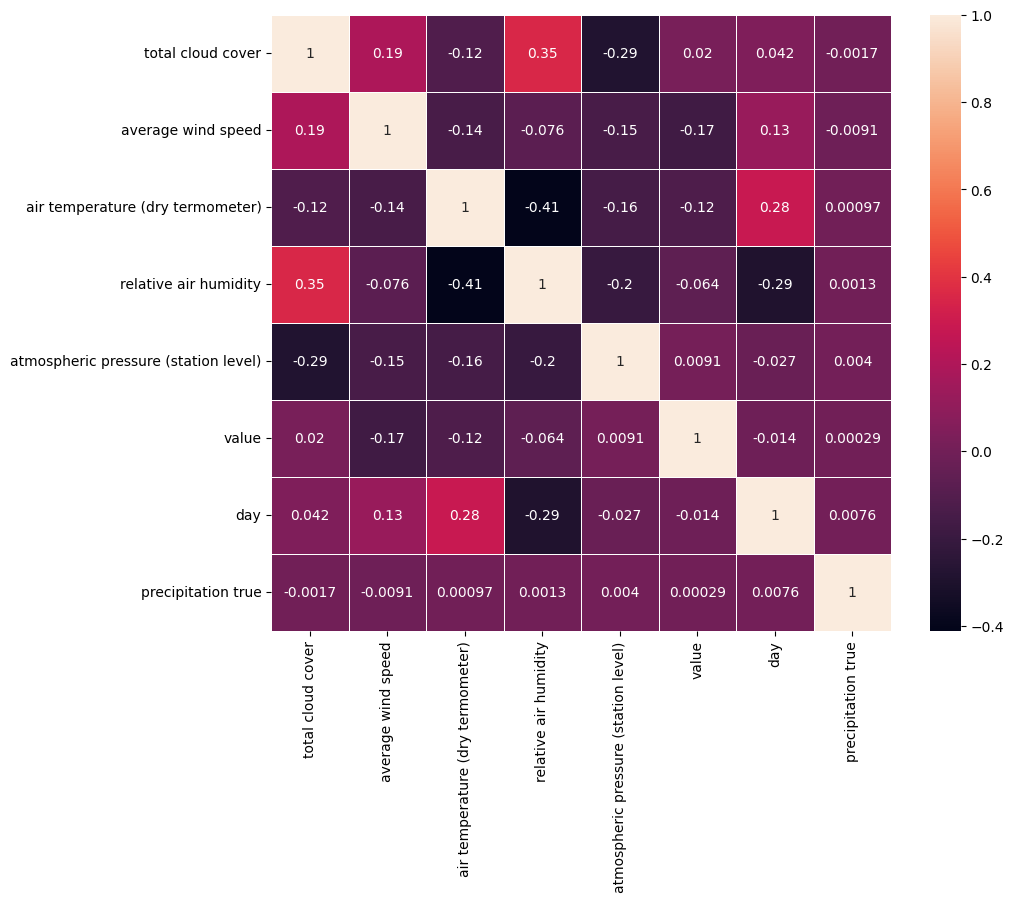

In [11]:
table = dataset_old.corr()
table
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, linewidth=0.5)
plt.show()

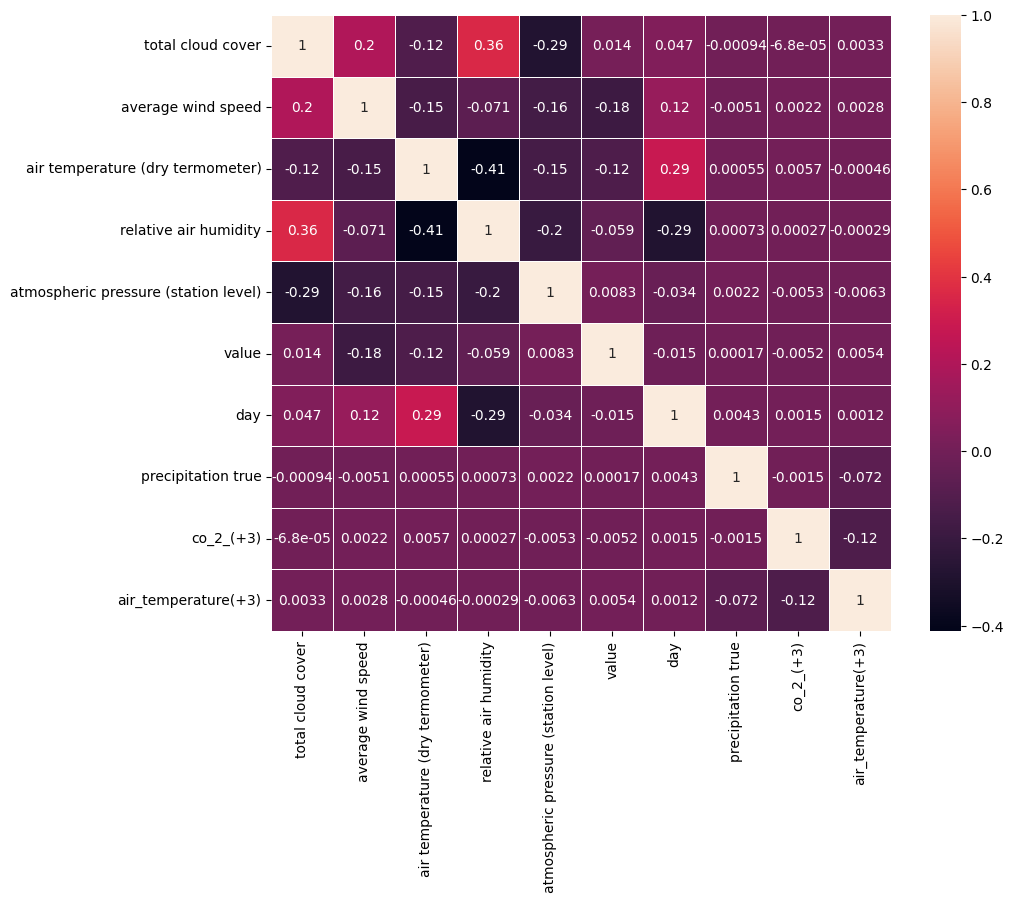

In [41]:
table = dataset.corr()
table
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, linewidth=0.5)
plt.show()

In [198]:
history = []
reg = RandomForestClassifier()
cvs = cross_val_score(reg, X_res, y_res, cv=5, scoring="f1")
np.mean(cvs)

0.9950500073770614

In [194]:
history = []
reg = RandomForestClassifier()
cvs = cross_val_score(reg, X_old, y_old, cv=5, scoring="f1")
np.mean(cvs)

0.9957807299988168

In [195]:
history = []
reg = RandomForestClassifier()
cvs = cross_val_score(reg, X, y, cv=5, scoring="f1")
np.mean(cvs)

0.9995735800931582

In [196]:
clf = RandomForestClassifier()
clf.fit(X, y)
clf.feature_importances_

array([0.04741427, 0.04348477, 0.14589444, 0.11684478, 0.14652945,
       0.15407299, 0.01649881, 0.15768801, 0.17157247])

In [197]:
dataset.columns

Index(['total cloud cover', 'average wind speed',
       'air temperature (dry termometer)', 'relative air humidity',
       'atmospheric pressure (station level)', 'value', 'day',
       'precipitation true', 'co_2_(+3)', 'air_temperature(+3)'],
      dtype='object')

In [11]:
history = []
for k in range(1, 10):
    print(k)
    reg = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(reg, X, y, cv=5, scoring="accuracy")
    mean_cvs = np.mean(cvs)
    history.append((np.abs(mean_cvs), k))

1
2
3
4
5
6
7
8
9


In [13]:
sorted(history)[::-1]

[(0.9135154023359217, 8),
 (0.9132783561543831, 9),
 (0.9131785487514386, 6),
 (0.9123551223061153, 7),
 (0.9115940757794873, 4),
 (0.9090239851491727, 5),
 (0.9074145574079354, 2),
 (0.8960862206580178, 3),
 (0.8418024808686134, 1)]

In [12]:
history1 = []
for k in range(1, 10):
    print(k)
    reg1 = KNeighborsClassifier(n_neighbors = k)
    cvs1 = cross_val_score(reg, X_res, y_res, cv=5, scoring="accuracy")
    mean_cvs1 = np.mean(cvs1)
    history1.append((np.abs(mean_cvs1), k))

1
2
3
4
5
6
7
8
9


In [14]:
sorted(history1)[::-1]

[(0.9132783561543831, 9),
 (0.9132783561543831, 8),
 (0.9132783561543831, 7),
 (0.9132783561543831, 6),
 (0.9132783561543831, 5),
 (0.9132783561543831, 4),
 (0.9132783561543831, 3),
 (0.9132783561543831, 2),
 (0.9132783561543831, 1)]

In [ ]:
##в knn модели показатели accuracy не изменяется в зависимости от подбора гиперпораметра С и не зависит от облачности

<function matplotlib.pyplot.show(close=None, block=None)>

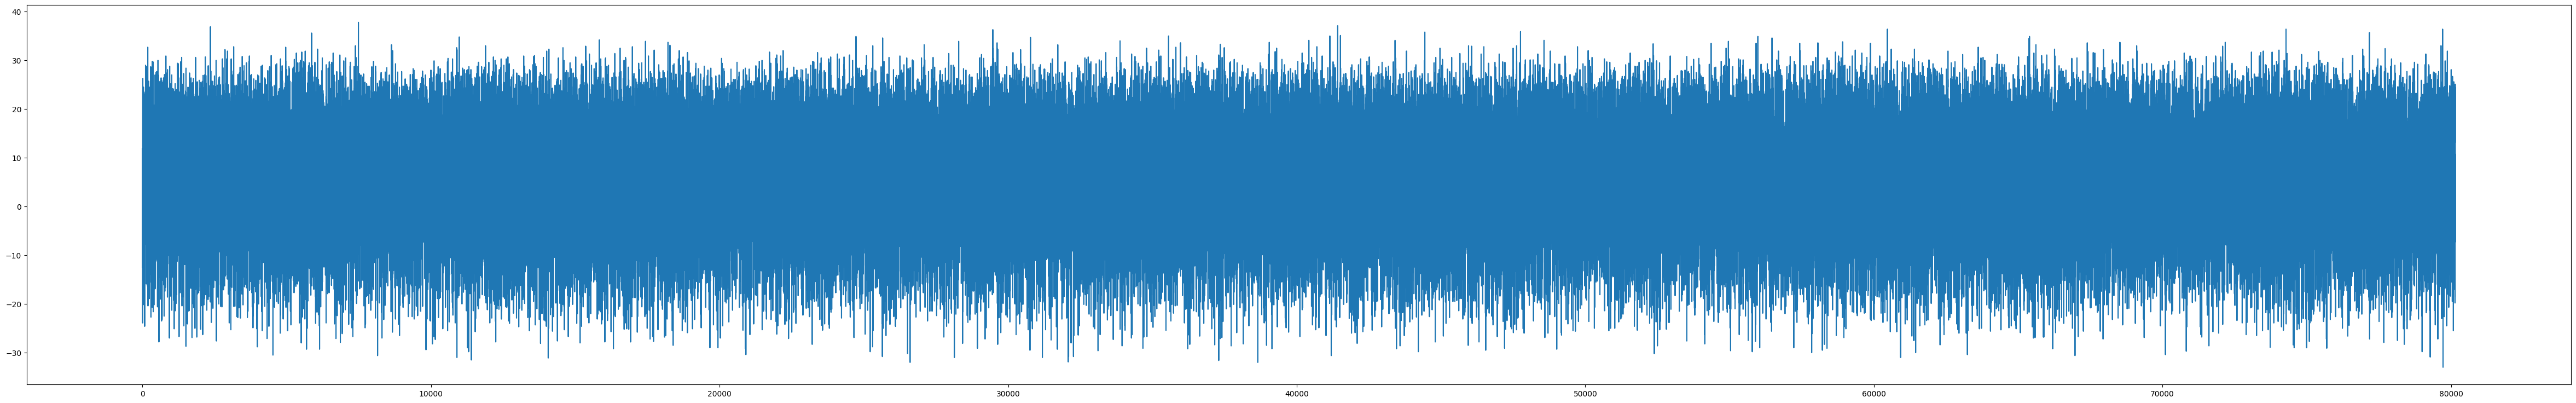

In [51]:
fig = plt.figure(figsize=(60,9))
ax1 = fig.add_subplot(111)
ax1.plot(dataset["air temperature (dry termometer)"])
plt.show